HOMEWORK


ES 1

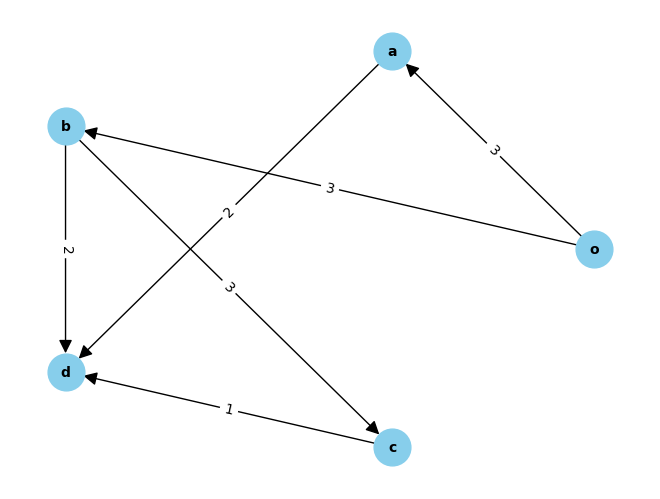

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_weighted_graph_with_capacities(G):
    pos=nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'capacity'))

# Create a directed graph
G = nx.DiGraph()

# Add edges with capacities
edges = [('o', 'a', 3), ('o', 'b', 3), ('a', 'd', 2), ('b', 'c', 3), ('b', 'd', 2), ('c', 'd', 1)]
G.add_weighted_edges_from(edges, weight='capacity')

# Draw Graph
draw_weighted_graph_with_capacities(G)


a) What is the minimum aggregate capacity that needs to be removed for no feasible flow from o to d to exist?

In [4]:
import networkx as nx

# Find the minimum cut
cut_value = nx.minimum_cut_value(G, 'o', 'd', capacity='capacity')

print("the minimum aggregate capacity that needs to be removed for no feasible flow from o to d to exist is : ",cut_value)

the minimum aggregate capacity that needs to be removed for no feasible flow from o to d to exist is :  5


b) What is the maximum aggregate capacity that can be removed from the links without affecting the maximum throughput from o to d?

In [7]:
import networkx as nx

# Find the flow in each edge
_, flow_dict  = nx.maximum_flow(G, 'o', 'd', capacity='capacity')

# Compute the excess capacity that can be removed from each edge
edges_with_excess_capacity = []
aggregate_capacity = 0

for n1 in G:
    for n2 in flow_dict[n1]:

        # Iter on each edge and look for a positive difference=capacity-flow > 0
        if (difference := G[n1][n2]['capacity'] - flow_dict[n1][n2]) > 0:

            # Save the tuple (edge, difference)
            edges_with_excess_capacity.append((n1,n2,difference))

            # Update the total excess
            aggregate_capacity += difference

print(f"the maximum aggregate capacity that can be removed from the links without affecting the maximum throughput from o to d is {aggregate_capacity}")
print(f"with excess capacity removed from edges : {edges_with_excess_capacity}")
print(flow_dict)



the maximum aggregate capacity that can be removed from the links without affecting the maximum throughput from o to d is 3
with excess capacity removed from edges : [('o', 'a', 1), ('b', 'c', 2)]
{'o': {'a': 2, 'b': 3}, 'a': {'d': 2}, 'b': {'c': 1, 'd': 2}, 'd': {}, 'c': {'d': 1}}


c) You are given x > 0 extra units of capacity. How should you distribute them in order to maximize the throughput that can be sent from o to d?

Plot the maximum throughput from o to d as a function of x >= 0.

f = [5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10]
x = 10


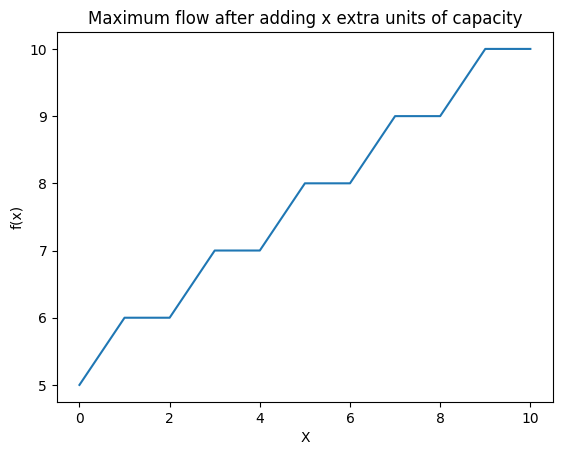

In [6]:
import networkx as nx

def plot_f(f,x):
    # Plot the function
    plt.plot(range(x+1), f)
    plt.xlabel('X')
    plt.ylabel('f(x)')
    plt.title('Maximum flow after adding x extra units of capacity')
    plt.show()

def f(G,x):
    ff = []
    if x<0:
        return ff

    ff.append(nx.minimum_cut_value(G, 'o', 'd', capacity='capacity'))
    if x==0:
        return ff

    for x in range(1,x+1):
        # Find minimum cut partition
        _, partition = nx.minimum_cut(G, 'o', 'd', capacity='capacity')

        # Find edges that connect the two partitions
        edges_between_partitions = [(u, v) for u, v in G.edges() if (u in partition[0] and v in partition[1]) or (u in partition[1] and v in partition[0])]
        # Sort theme by increasing capacities
        edges_between_partitions = sorted(edges_between_partitions, key=lambda edge: G[edge[0]][edge[1]]['capacity'], reverse=True)

        i=0
        while True:
            # choose an edge from the ones found before
            n1,n2=edges_between_partitions[i]
            i+=1

            # Increase the capacity of the edge by a unity
            G[n1][n2]['capacity'] += 1

           # Compute the new min cut
            cut_value_new = nx.minimum_cut_value(G, 'o', 'd', capacity='capacity')

            # If there's an improvement...
            if cut_value_new > cut_value:
 
                # Save new max flow value
                ff.append(cut_value_new)

                # End iteration x
                break
            else:
                # Undo modification
                G[n1][n2]['capacity'] -= 1

            # If no edge can improve the min cut then increase the first of the list
            if i >= edges_between_partitions.__len__():
                n1,n2=edges_between_partitions[0]
                G[n1][n2]['capacity'] += 1

                # Save prevous max flow value
                ff.append(cut_value)

                # end iteration x
                break
    return ff,G

x=10
f,_ = f(G.copy(),x)
print(f"f = {f}")
print(f'x = {x}')
plot_f(f,x)
#draw_weighted_graph_with_capacities(G)
#draw_weighted_graph_with_capacities(G1)

